In [1]:
# import section
import numpy as np
import py3Dmol as p3d
import veloxchem as vlx
from matplotlib import pyplot as plt

basis_set_label = "6-31G"

In [2]:
# define molecules and basis sets
ethene_xyz = """6
 ethene
 C          0.000000    -0.663984   0.000000
 C          0.000000     0.663984   0.000000
 H          0.919796    -1.223061   0.000000
 H         -0.919796    -1.223061   0.000000
 H          0.919796     1.223061   0.000000
 H         -0.919796     1.223061   0.000000
"""
ethene = vlx.Molecule.read_xyz_string(ethene_xyz)
ethene_basis = vlx.MolecularBasis.read(ethene, basis_set_label, ostream=None)

In [3]:
fluoroethene_xyz = """6
fluoroethene
 C          0.000000    -0.663984   0.000000
 C          0.000000     0.663984   0.000000
 F          1.519796    -1.223061   0.000000
 H         -0.919796    -1.223061   0.000000
 H          0.919796     1.223061   0.000000
 H         -0.919796     1.223061   0.000000
 """
fluoroethene = vlx.Molecule.read_xyz_string(fluoroethene_xyz)
fluoroethene_basis = vlx.MolecularBasis.read(fluoroethene, basis_set_label, ostream=None)

In [4]:
chloroethene_xyz = """6
chloroethene
 C          0.000000    -0.663984   0.000000
 C          0.000000     0.663984   0.000000
 Cl         1.519796    -1.223061   0.000000
 H         -0.919796    -1.223061   0.000000
 H          0.919796     1.223061   0.000000
 H         -0.919796     1.223061   0.000000
 """
chloroethene = vlx.Molecule.read_xyz_string(chloroethene_xyz)
chloroethene_basis = vlx.MolecularBasis.read(chloroethene, basis_set_label, ostream=None)

In [5]:
view = p3d.view(linked=True, viewergrid=(1, 3), width=600, height=200)
view.addModel(ethene_xyz, "xyz", viewer=(0, 0))
view.addModel(fluoroethene_xyz, "xyz", viewer=(0, 1))
view.addModel(chloroethene_xyz, "xyz", viewer=(0, 2))
view.setViewStyle({"style": "outline", "width": 0.05})
view.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
# Settings for SCF and gradient drivers
scf_settings = {"conv_thresh": 1e-6}
method_settings = {}

In [7]:
# Run SCF for ethene
ethene_scf_drv = vlx.ScfRestrictedDriver()
ethene_scf_drv.update_settings(scf_settings, method_settings)
ethene_scf_drv.ostream.mute()
ethene_scf_results = ethene_scf_drv.compute(ethene, ethene_basis)

# Run SCF for fluoroethene
fluoroethene_scf_drv = vlx.ScfRestrictedDriver()
fluoroethene_scf_drv.update_settings(scf_settings, method_settings)
fluoroethene_scf_drv.ostream.mute()
fluoroethene_scf_results = fluoroethene_scf_drv.compute(
    fluoroethene, fluoroethene_basis
)

# Run SCF for chloroethene
chloroethene_scf_drv = vlx.ScfRestrictedDriver()
chloroethene_scf_drv.update_settings(scf_settings, method_settings)
chloroethene_scf_drv.ostream.mute()
chloroethene_scf_results = chloroethene_scf_drv.compute(
    chloroethene, chloroethene_basis
)

In [8]:
# Set up the gradient and optimization dirvers:
ethene_grad_drv = vlx.ScfGradientDriver(ethene_scf_drv)
ethene_opt_drv = vlx.OptimizationDriver(ethene_grad_drv)

fluoroethene_grad_drv = vlx.ScfGradientDriver(fluoroethene_scf_drv)
fluoroethene_opt_drv = vlx.OptimizationDriver(fluoroethene_grad_drv)

chloroethene_grad_drv = vlx.ScfGradientDriver(chloroethene_scf_drv)
chloroethene_opt_drv = vlx.OptimizationDriver(chloroethene_grad_drv)

In [9]:
# Either optimize the geometries
# Uncomment below
# ethene_opt_drv.ostream.unmute()
# opt_ethene = ethene_opt_drv.compute(ethene, ethene_basis)
# fluoroethene_opt_drv.ostream.unmute()
# opt_fluoroethene = fluoroethene_opt_drv.compute(fluoroethene, fluoroethene_basis)
# chloroethene_opt_drv.ostream.unmute()
# opt_chloroethene = chloroethene_opt_drv.compute(chloroethene, chloroethene_basis)

# Or read them from file if already calculated
opt_ethene = vlx.Molecule.read_xyz_file("../../data/ir_raman/opt_ethene.xyz")
ethene_basis = vlx.MolecularBasis.read(opt_ethene, basis_set_label, ostream=None)

opt_fluoroethene = vlx.Molecule.read_xyz_file(
    "../../data/ir_raman/opt_fluoroethene.xyz"
)
fluoroethene_basis = vlx.MolecularBasis.read(opt_fluoroethene, basis_set_label, ostream=None)

opt_chloroethene = vlx.Molecule.read_xyz_file(
    "../../data/ir_raman/opt_chloroethene.xyz"
)
chloroethene_basis = vlx.MolecularBasis.read(opt_chloroethene, basis_set_label, ostream=None)

In [10]:
ethene_scf_results = ethene_scf_drv.compute(opt_ethene, ethene_basis)
fluoroethene_scf_results = fluoroethene_scf_drv.compute(
    opt_fluoroethene, fluoroethene_basis
)
chloroethene_scf_results = chloroethene_scf_drv.compute(
    opt_chloroethene, chloroethene_basis
)

In [11]:
# Settings for Hessian calculation
hessian_settings = {"do_raman": "yes", "print_depolarization_ratio": "no"}

In [12]:
# Create Hessian driver and update settings
ethene_vibanalysis_drv = vlx.VibrationalAnalysis(ethene_scf_drv)
ethene_vibanalysis_drv.update_settings(method_settings, hessian_settings)

fluoroethene_vibanalysis_drv = vlx.VibrationalAnalysis(fluoroethene_scf_drv)
fluoroethene_vibanalysis_drv.update_settings(method_settings, hessian_settings)

chloroethene_vibanalysis_drv = vlx.VibrationalAnalysis(chloroethene_scf_drv)
chloroethene_vibanalysis_drv.update_settings(method_settings, hessian_settings)

# Calculate
# ethene_vibanalysis_drv.compute(ethene, ethene_basis)
# fluoroethene_vibanalysis_drv.compute(fluoroethene, fluoroethene_basis)
# chloroethene_vibanalysis_drv.compute(chloroethene, chloroethene_basis)

# Or read from file:
import h5py

fname = "../../data/ir_raman/ethenes.h5"
hf = h5py.File(fname, "r")

labels = ["ethene", "fluoroethene", "chloroethene"]

i = 0
for driver in [ethene_vibanalysis_drv, fluoroethene_vibanalysis_drv, chloroethene_vibanalysis_drv]:
    label = labels[i]

    driver.hessian = np.array(hf.get(label + "_hessian"))
    driver.dipole_gradient = np.array(hf.get(label + "_dipolegrad"))
    driver.polarizability_gradient = np.array(hf.get(label + "_polgrad"))

    i += 1

hf.close()

In [13]:
# Broadening function
def add_broadening(
    list_ex_energy,
    list_osci_strength,
    line_profile="Lorentzian",
    line_param=10,
    step=10,
):
    x_min = np.amin(list_ex_energy) - 50
    x_max = np.amax(list_ex_energy) + 50
    x = np.arange(x_min, x_max, step)
    y = np.zeros((len(x)))
    # print(x)
    # print(y)

    # go through the frames and calculate the spectrum for each frame
    for xp in range(len(x)):
        for e, f in zip(list_ex_energy, list_osci_strength):
            if line_profile == "Gaussian":
                y[xp] += f * np.exp(-(((e - x[xp]) / line_param) ** 2))
            elif line_profile == "Lorentzian":
                y[xp] += (
                    0.5
                    * line_param
                    * f
                    / (np.pi * ((x[xp] - e) ** 2 + 0.25 * line_param**2))
                )
    return x, y

In [14]:
# To animate the normal mode we will need both the geometry and the displacements
def get_normal_mode(molecule, normal_mode):
    elements = molecule.get_labels()
    coords = (
        molecule.get_coordinates_in_angstrom()
    )  # To transform from au to A
    natm = molecule.number_of_atoms()

    vib_xyz = "%d\n\n" % natm
    nm = normal_mode.reshape(natm, 3)
    for i in range(natm):
        # add coordinates:
        vib_xyz += elements[i] + " %15.7f %15.7f %15.7f " % (
            coords[i, 0],
            coords[i, 1],
            coords[i, 2],
        )

        # add displacements:
        vib_xyz += "%15.7f %15.7f %15.7f\n" % (nm[i, 0], nm[i, 1], nm[i, 2])
    return vib_xyz

In [15]:
# Run for all molecules
ethene_vibanalysis_drv.compute(opt_ethene, ethene_basis)
fluoroethene_vibanalysis_drv.compute(opt_fluoroethene, fluoroethene_basis)
chloroethene_vibanalysis_drv.compute(opt_chloroethene, chloroethene_basis)

{'molecule_xyz_string': '6\n\nC              0.011583800000        -0.577580900000        -0.000000000000\nC             -0.026841700000         0.733720600000         0.000000000000\nCl             1.563965600000        -1.502572600000        -0.000000000000\nH             -0.832947300000        -1.229618500000         0.000000000000\nH              0.857898600000         1.337704800000        -0.000000000000\nH             -0.973659000000         1.238346500000         0.000000000000\n',
 'gibbs_free_energy': -536.8614952494994,
 'free_energy_summary': 'Note: Rotational symmetry is set to 1 regardless of true symmetry\nNo Imaginary Frequencies\n\nFree energy contributions calculated at @ 298.15 K:\nZero-point vibrational energy:                                   28.9842 kcal/mol\nH   (Trans + Rot + Vib = Tot):   1.4812 +   0.8887 +   0.3734 =   2.7434 kcal/mol\nS   (Trans + Rot + Vib = Tot):  38.3430 +  22.7686 +   1.7002 =  62.8118 cal/mol/K\nTS  (Trans + Rot + Vib = Tot):  11.4320 

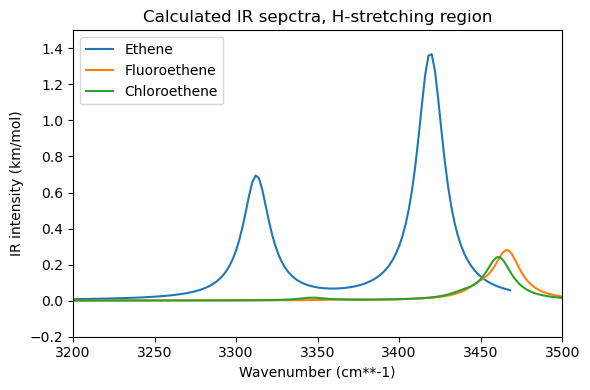

In [16]:
# Plot the IR spectra
plt.figure(figsize=(6, 4))

eth_x, eth_ir = ethene_vibanalysis_drv.vib_frequencies, ethene_vibanalysis_drv.ir_intensities
flo_x, flo_ir = (
    fluoroethene_vibanalysis_drv.vib_frequencies,
    fluoroethene_vibanalysis_drv.ir_intensities,
)
chl_x, chl_ir = (
    chloroethene_vibanalysis_drv.vib_frequencies,
    chloroethene_vibanalysis_drv.ir_intensities,
)

eth_xl, eth_irl = add_broadening(
    eth_x, eth_ir, line_profile="Lorentzian", line_param=20, step=2
)
flo_xl, flo_irl = add_broadening(
    flo_x, flo_ir, line_profile="Lorentzian", line_param=20, step=2
)
chl_xl, chl_irl = add_broadening(
    chl_x, chl_ir, line_profile="Lorentzian", line_param=20, step=2
)

plt.plot(eth_xl, eth_irl, label="Ethene")
plt.plot(flo_xl, flo_irl, label="Fluoroethene")
plt.plot(chl_xl, chl_irl, label="Chloroethene")

plt.xlabel("Wavenumber (cm**-1)")
plt.axis(xmin=3200, xmax=3500)
plt.axis(ymin=-0.2, ymax=1.5)
plt.ylabel("IR intensity (km/mol)")
plt.title("Calculated IR sepctra, H-stretching region")
plt.legend()
plt.tight_layout()
plt.show()

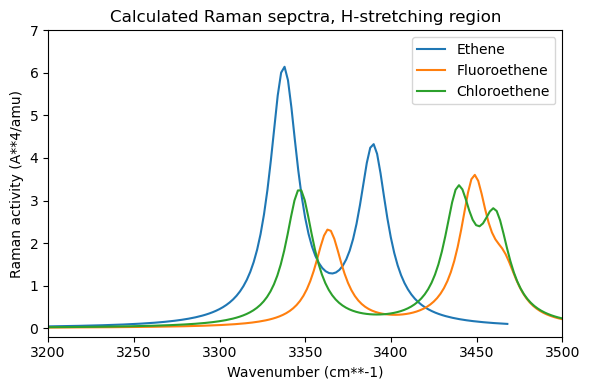

In [17]:
# Plot the Raman spectra
plt.figure(figsize=(6, 4))

eth_x, eth_raman = ethene_vibanalysis_drv.vib_frequencies, ethene_vibanalysis_drv.raman_activities
flo_x, flo_raman = (
    fluoroethene_vibanalysis_drv.vib_frequencies,
    fluoroethene_vibanalysis_drv.raman_activities,
)
chl_x, chl_raman = (
    chloroethene_vibanalysis_drv.vib_frequencies,
    chloroethene_vibanalysis_drv.raman_activities,
)

freq = 0
eth_xl, eth_ramanl = add_broadening(
    eth_x, eth_raman[freq], line_profile="Lorentzian", line_param=20, step=2
)
flo_xl, flo_ramanl = add_broadening(
    flo_x, flo_raman[freq], line_profile="Lorentzian", line_param=20, step=2
)
chl_xl, chl_ramanl = add_broadening(
    chl_x, chl_raman[freq], line_profile="Lorentzian", line_param=20, step=2
)

plt.plot(eth_xl, eth_ramanl, label="Ethene")
plt.plot(flo_xl, flo_ramanl, label="Fluoroethene")
plt.plot(chl_xl, chl_ramanl, label="Chloroethene")

plt.xlabel("Wavenumber (cm**-1)")
plt.axis(xmin=3200, xmax=3500)
plt.axis(ymin=-0.2, ymax=7)
plt.ylabel("Raman activity (A**4/amu)")
plt.title("Calculated Raman sepctra, H-stretching region")
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# Get the displacements of the normal mode
ethene_h1 = get_normal_mode(ethene, ethene_vibanalysis_drv.normal_modes[-1])
fluoroethene_h1 = get_normal_mode(
    fluoroethene, fluoroethene_vibanalysis_drv.normal_modes[-1]
)
chloroethene_h1 = get_normal_mode(
    chloroethene, chloroethene_vibanalysis_drv.normal_modes[-1]
)

In [19]:
# Animate the vibration
view = p3d.view(viewergrid=(1, 3), width=600, height=200, linked=True)
view.addModel(
    ethene_h1, "xyz", {"vibrate": {"frames": 10, "amplitude": 0.75}}, viewer=(0, 0)
)
view.addModel(
    fluoroethene_h1,
    "xyz",
    {"vibrate": {"frames": 10, "amplitude": 0.75}},
    viewer=(0, 1),
)
view.addModel(
    chloroethene_h1,
    "xyz",
    {"vibrate": {"frames": 10, "amplitude": 0.75}},
    viewer=(0, 2),
)

view.setViewStyle({"style": "outline", "width": 0.05})
view.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
view.animate({"loop": "backAndForth"})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Ground state dipole moments:   x             y            z       

Ethene                     : -0.00 a.u.    -0.00 a.u.   -0.00 a.u.
Fluoroethene               : -0.79 a.u.     0.39 a.u.   -0.00 a.u.
Chloroethene               : -0.77 a.u.     0.59 a.u.    0.00 a.u.



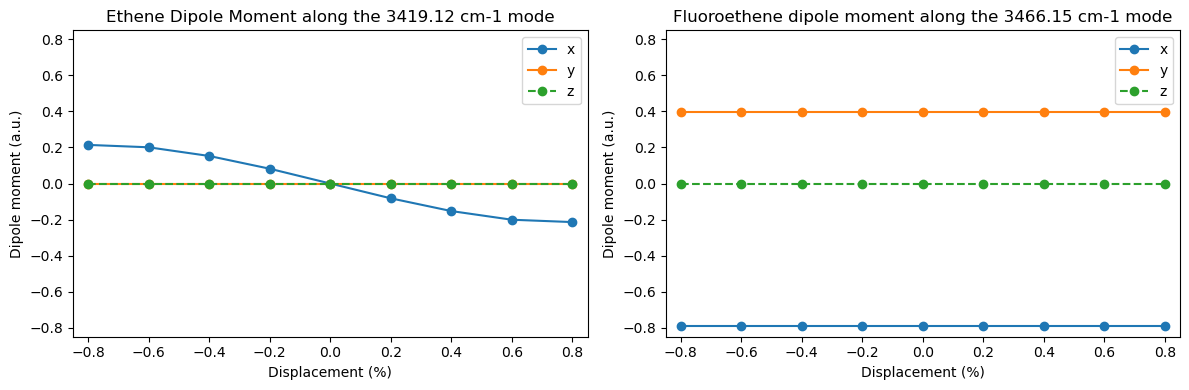

In [20]:
ethene_prop = vlx.firstorderprop.FirstOrderProperties()
ethene_prop.compute_scf_prop(opt_ethene, ethene_basis, ethene_scf_results)
ethene_dipole_moment = ethene_prop.get_property("dipole moment")

fluoroethene_prop = vlx.firstorderprop.FirstOrderProperties()
fluoroethene_prop.compute_scf_prop(
    opt_fluoroethene, fluoroethene_basis, fluoroethene_scf_results
)
fluoroethene_dipole_moment = fluoroethene_prop.get_property("dipole moment")

chloroethene_prop = vlx.firstorderprop.FirstOrderProperties()
chloroethene_prop.compute_scf_prop(
    opt_chloroethene, chloroethene_basis, chloroethene_scf_results
)
chloroethene_dipole_moment = chloroethene_prop.get_property("dipole moment")

print("Ground state dipole moments:   x             y            z       \n")
print(
    "Ethene                     : %5.2f a.u.    %5.2f a.u.   %5.2f a.u."
    % (ethene_dipole_moment[0], ethene_dipole_moment[1], ethene_dipole_moment[2])
)
print(
    "Fluoroethene               : %5.2f a.u.    %5.2f a.u.   %5.2f a.u."
    % (
        fluoroethene_dipole_moment[0],
        fluoroethene_dipole_moment[1],
        fluoroethene_dipole_moment[2],
    )
)
print(
    "Chloroethene               : %5.2f a.u.    %5.2f a.u.   %5.2f a.u."
    % (
        chloroethene_dipole_moment[0],
        chloroethene_dipole_moment[1],
        chloroethene_dipole_moment[2],
    )
)
print()

ethene_moments = []
fluoroethene_moments = []

natm = opt_ethene.number_of_atoms()

new_ethene_scf_drv = vlx.scfrestdriver.ScfRestrictedDriver()
new_ethene_scf_drv.ostream.state = False
ethene_displacements = ethene_vibanalysis_drv.normal_modes[-1].reshape(natm, 3)
ethene_labels = opt_ethene.get_labels()

new_fluoroethene_scf_drv = vlx.scfrestdriver.ScfRestrictedDriver()
new_fluoroethene_scf_drv.ostream.state = False
fluoroethene_displacements = fluoroethene_vibanalysis_drv.normal_modes[-1].reshape(natm, 3)
fluoroethene_labels = opt_fluoroethene.get_labels()

x_list = np.arange(-0.8, 0.81, 0.2)

# Calculate the dipole moment for different displacements
for x in x_list:
    ethene_coords = opt_ethene.get_coordinates_in_angstrom()
    ethene_coords += x * ethene_displacements
    new_ethene = vlx.molecule.Molecule(ethene_labels, ethene_coords, units="angstrom")
    new_ethene_scf_results = new_ethene_scf_drv.compute(new_ethene, ethene_basis)
    ethene_prop.compute_scf_prop(new_ethene, ethene_basis, new_ethene_scf_results)
    ethene_dipole_moment = ethene_prop.get_property("dipole moment")
    ethene_moments.append(ethene_dipole_moment)

for x in x_list:
    fluoro_coords = opt_fluoroethene.get_coordinates_in_angstrom()
    fluoro_coords += x * fluoroethene_displacements
    new_fluoroethene = vlx.molecule.Molecule(
        fluoroethene_labels, fluoro_coords, units="angstrom"
    )
    new_fluoroethene_scf_results = new_fluoroethene_scf_drv.compute(
        new_fluoroethene, fluoroethene_basis
    )
    ethene_prop.compute_scf_prop(
        new_fluoroethene, fluoroethene_basis, new_fluoroethene_scf_results
    )
    fluoroethene_dipole_moment = fluoroethene_prop.get_property("dipole moment")
    fluoroethene_moments.append(fluoroethene_dipole_moment)


ethene_moments_array = np.array(ethene_moments)
fluoroethene_moments_array = np.array(fluoroethene_moments)

# Plot
figure = plt.figure(figsize=(12, 4))

plt1 = figure.add_subplot(1, 2, 1)
plt.plot(x_list, ethene_moments_array[:, 0], "-o", label="x")
plt.plot(x_list, ethene_moments_array[:, 1], "-o", label="y")
plt.plot(x_list, ethene_moments_array[:, 2], "--o", label="z")
plt.axis(xmin=-0.85, xmax=0.85)
plt.axis(ymin=-0.85, ymax=0.85)
plt.xlabel("Displacement (%)")
plt.ylabel("Dipole moment (a.u.)")
plt.title(
    "Ethene Dipole Moment along the %.2f cm-1 mode" % ethene_vibanalysis_drv.vib_frequencies[-1]
)
plt.legend()

plt2 = figure.add_subplot(1, 2, 2)
plt.plot(x_list, fluoroethene_moments_array[:, 0], "-o", label="x")
plt.plot(x_list, fluoroethene_moments_array[:, 1], "-o", label="y")
plt.plot(x_list, fluoroethene_moments_array[:, 2], "--o", label="z")
plt.axis(xmin=-0.85, xmax=0.85)
plt.axis(ymin=-0.85, ymax=0.85)
plt.xlabel("Displacement (%)")
plt.ylabel("Dipole moment (a.u.)")
plt.title(
    "Fluoroethene dipole moment along the %.2f cm-1 mode"
    % fluoroethene_vibanalysis_drv.vib_frequencies[-1]
)
plt.legend()

plt.tight_layout()
plt.show()

Ground state polarizabilities:    xx             yy           zz

Ethene                       : -19.19 a.u.    -32.45 a.u.   -7.15 a.u.
Fluoroethene                 : -18.86 a.u.    -30.62 a.u.   -7.81 a.u.
Chloroethene                 : -31.94 a.u.    -41.05 a.u.   -10.12 a.u.



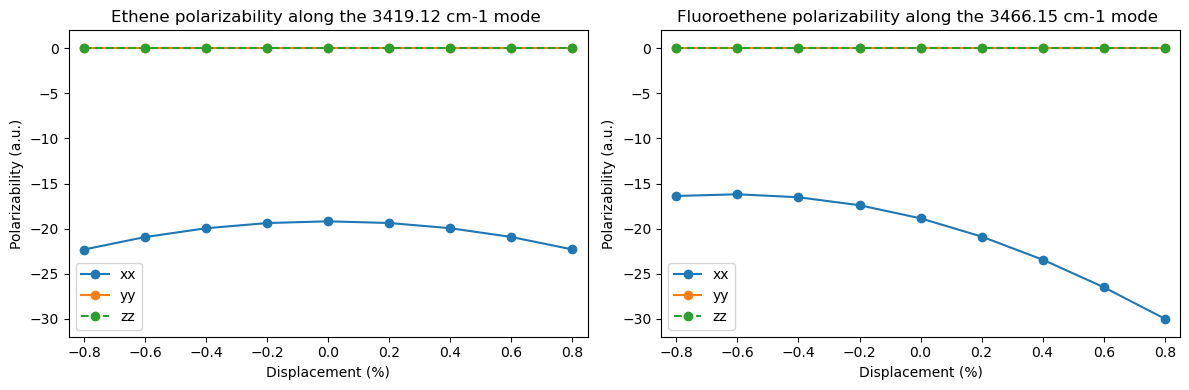

In [21]:
# Calculate the polarizability of the optimized molecules
# For this, we need to run a linear response calculation
ethene_lrdrv = vlx.lrsolver.LinearResponseSolver()
ethene_lrdrv.ostream.mute()
ethene_pol_dict = ethene_lrdrv.compute(opt_ethene, ethene_basis, ethene_scf_results)
ethene_polarizability = ethene_pol_dict["response_functions"]

fluoroethene_lrdrv = vlx.lrsolver.LinearResponseSolver()
fluoroethene_lrdrv.ostream.mute()
fluoroethene_pol_dict = fluoroethene_lrdrv.compute(
    opt_fluoroethene, fluoroethene_basis, fluoroethene_scf_results
)
fluoroethene_polarizability = fluoroethene_pol_dict["response_functions"]

chloroethene_lrdrv = vlx.lrsolver.LinearResponseSolver()
chloroethene_lrdrv.ostream.mute()
chloroethene_pol_dict = chloroethene_lrdrv.compute(
    opt_chloroethene, chloroethene_basis, chloroethene_scf_results
)
chloroethene_polarizability = chloroethene_pol_dict["response_functions"]

print("Ground state polarizabilities:    xx             yy           zz\n")
print(
    "Ethene                       : %5.2f a.u.    %5.2f a.u.   %5.2f a.u."
    % (
        ethene_polarizability[("x", "x", 0)],
        ethene_polarizability[("y", "y", 0)],
        ethene_polarizability[("z", "z", 0)],
    )
)
print(
    "Fluoroethene                 : %5.2f a.u.    %5.2f a.u.   %5.2f a.u."
    % (
        fluoroethene_polarizability[("x", "x", 0)],
        fluoroethene_polarizability[("y", "y", 0)],
        fluoroethene_polarizability[("z", "z", 0)],
    )
)
print(
    "Chloroethene                 : %5.2f a.u.    %5.2f a.u.   %5.2f a.u."
    % (
        chloroethene_polarizability[("x", "x", 0)],
        chloroethene_polarizability[("y", "y", 0)],
        chloroethene_polarizability[("z", "z", 0)],
    )
)
print()

# Save polarizability dictionary keys
keys = ethene_pol_dict["response_functions"].keys()

ethene_pol = []
fluoroethene_pol = []

# Create new linear response solvers to re-calculate the polarizabilities
new_ethene_lrdrv = vlx.lrsolver.LinearResponseSolver()
new_ethene_lrdrv.ostream.mute()

new_fluoroethene_lrdrv = vlx.lrsolver.LinearResponseSolver()
new_fluoroethene_lrdrv.ostream.mute()

# Calculate the polarizability for different displacements
for x in x_list:
    ethene_coords = opt_ethene.get_coordinates_in_angstrom()
    ethene_coords += x * ethene_displacements
    new_ethene = vlx.molecule.Molecule(ethene_labels, ethene_coords, units="angstrom")
    new_ethene_scf_results = new_ethene_scf_drv.compute(new_ethene, ethene_basis)

    new_ethene_pol_dict = new_ethene_lrdrv.compute(
        new_ethene, ethene_basis, new_ethene_scf_results
    )

    ethene_polarizability = np.zeros((9))
    i = 0
    for key in keys:
        ethene_polarizability[i] = new_ethene_pol_dict["response_functions"][key]
        i += 1
    ethene_pol.append(ethene_polarizability.reshape(3, 3))

for x in x_list:
    fluoro_coords = opt_fluoroethene.get_coordinates_in_angstrom()
    fluoro_coords += x * fluoroethene_displacements
    new_fluoroethene = vlx.molecule.Molecule(
        fluoroethene_labels, fluoro_coords, units="angstrom"
    )
    new_fluoroethene_scf_results = new_fluoroethene_scf_drv.compute(
        new_fluoroethene, fluoroethene_basis
    )

    new_fluoroethene_pol_dict = new_fluoroethene_lrdrv.compute(
        new_fluoroethene, fluoroethene_basis, new_fluoroethene_scf_results
    )

    fluoroethene_polarizability = np.zeros((9))
    i = 0
    for key in keys:
        fluoroethene_polarizability[i] = new_fluoroethene_pol_dict[
            "response_functions"
        ][key]
        i += 1
    fluoroethene_pol.append(fluoroethene_polarizability.reshape(3, 3))

ethene_polarizability_array = np.array(ethene_pol)
fluoroethene_polarizability_array = np.array(fluoroethene_pol)

figure = plt.figure(figsize=(12, 4))

# Plot
plt1 = figure.add_subplot(1, 2, 1)
plt.plot(x_list, ethene_polarizability_array[:, 0, 0], "-o", label="xx")
plt.plot(x_list, ethene_polarizability_array[:, 1, 1], "-o", label="yy")
plt.plot(x_list, ethene_polarizability_array[:, 2, 2], "--o", label="zz")
plt.axis(xmin=-0.85, xmax=0.85)
plt.axis(ymin=-32.0, ymax=2.0)
plt.xlabel("Displacement (%)")
plt.ylabel("Polarizability (a.u.)")
plt.title(
    "Ethene polarizability along the %.2f cm-1 mode "
    % (ethene_vibanalysis_drv.vib_frequencies[-1])
)
plt.legend()

plt2 = figure.add_subplot(1, 2, 2)
plt.plot(x_list, fluoroethene_polarizability_array[:, 0, 0], "-o", label="xx")
plt.plot(x_list, fluoroethene_polarizability_array[:, 1, 1], "-o", label="yy")
plt.plot(x_list, fluoroethene_polarizability_array[:, 2, 2], "--o", label="zz")
plt.axis(xmin=-0.85, xmax=0.85)
plt.axis(ymin=-32.0, ymax=2.0)
plt.xlabel("Displacement (%)")
plt.ylabel("Polarizability (a.u.)")
plt.title(
    "Fluoroethene polarizability along the %.2f cm-1 mode "
    % (fluoroethene_vibanalysis_drv.vib_frequencies[-1])
)
plt.legend()

plt.tight_layout()
plt.show()